In [1]:
from packages import * 
from func import * 
import glob

In [2]:
# Load Folder

os.chdir('realizations/net_realization_1')
file_list = glob.glob("*.csv")
os.chdir('../')
os.chdir('../')

path = "realizations_combined/"
os.mkdir(path)

for j in file_list:
    all_filenames = []
    for i in range(2):
        all_filenames.append('realizations/net_realization_'+ str(i+1)+"/"+j)
    combined_csv = pd.concat([pd.read_csv(f, header = None) for f in all_filenames])
    
    combined_csv.to_csv(path+j, header = None, encoding='utf-8-sig')

In [13]:
# Run Fig 6
N, GA, GB, betaA, gammaA, betaB, gammaB, phi, p, t_max, niter = init() 

In [14]:
res5 = propagator_AB("c", GA, GB, 0.030, gammaA, 0.075, gammaB, 2, p, t_max)
res7 = propagator_AB("c", GA, GB, 0.050, gammaA, 0.075, gammaB, 2, p, t_max)
res9 = propagator_AB("c", GA, GB, 0.070, gammaA, 0.075, gammaB, 2, p, t_max)

## Plot Results - Young

In [3]:
df_A_phi0 = pd.read_csv(path+"results_betaA_phi0_Y.csv", header = None)
df_B_phi0 = pd.read_csv(path+"results_betaB_phi0_Y.csv", header = None)
df_A_phi2 = pd.read_csv(path+"results_betaA_phi2_Y.csv", header = None)
df_B_phi2 = pd.read_csv(path+"results_betaB_phi2_Y.csv", header = None)
df_A_phi4 = pd.read_csv(path+"results_betaA_phi4_Y.csv", header = None)
df_B_phi4 = pd.read_csv(path+"results_betaB_phi4_Y.csv", header = None)

df_A_phi0.columns = ["index", "betaA", "betaB", "RA", "RB", "VB"] 
df_B_phi0.columns = ["index", "betaA", "betaB", "RA", "RB", "VB"] 
df_A_phi2.columns = ["index", "betaA", "betaB", "RA", "RB", "VB"] 
df_B_phi2.columns = ["index", "betaA", "betaB", "RA", "RB", "VB"] 
df_A_phi4.columns = ["index", "betaA", "betaB", "RA", "RB", "VB"] 
df_B_phi4.columns = ["index", "betaA", "betaB", "RA", "RB", "VB"] 

df_A_b2 = pd.read_csv(path+"results_betaA_b2_Y.csv", header = None)
df_B_b2 = pd.read_csv(path+"results_betaB_b2_Y.csv", header = None)
df_A_b5 = pd.read_csv(path+"results_betaA_b5_Y.csv", header = None)
df_B_b5 = pd.read_csv(path+"results_betaB_b5_Y.csv", header = None)
df_A_b8 = pd.read_csv(path+"results_betaA_b8_Y.csv", header = None)
df_B_b8 = pd.read_csv(path+"results_betaB_b8_Y.csv", header = None)

df_A_b2.columns = ["index", "betaA", "betaB", "RA", "RB", "VB"] 
df_B_b2.columns = ["index", "betaA", "betaB", "RA", "RB", "VB"] 
df_A_b5.columns = ["index", "betaA", "betaB", "RA", "RB", "VB"] 
df_B_b5.columns = ["index", "betaA", "betaB", "RA", "RB", "VB"] 
df_A_b8.columns = ["index", "betaA", "betaB", "RA", "RB", "VB"] 
df_B_b8.columns = ["index", "betaA", "betaB", "RA", "RB", "VB"] 

In [4]:
df_A_phi0 = df_A_phi0.groupby(['index']).mean()
df_B_phi0 = df_B_phi0.groupby(['index']).mean()
df_A_phi2 = df_A_phi2.groupby(['index']).mean()
df_B_phi2 = df_B_phi2.groupby(['index']).mean()
df_A_phi4 = df_A_phi4.groupby(['index']).mean()
df_B_phi4 = df_B_phi4.groupby(['index']).mean()
df_A_b2   =   df_A_b2.groupby(['index']).mean()  
df_B_b2   =   df_B_b2.groupby(['index']).mean()  
df_A_b5   =   df_A_b5.groupby(['index']).mean()  
df_B_b5   =   df_B_b5.groupby(['index']).mean()  
df_A_b8   =   df_A_b8.groupby(['index']).mean()  
df_B_b8   =   df_B_b8.groupby(['index']).mean()  

### Fig 3

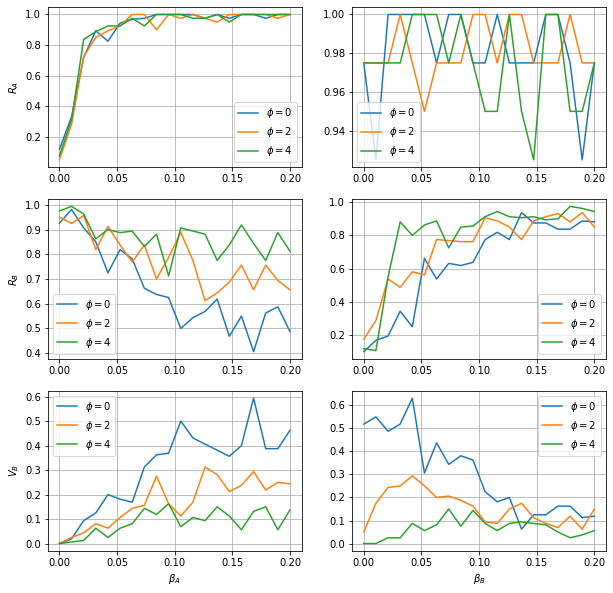

In [5]:
rows, cols = 3, 2
fig, ax = plt.subplots(rows, cols,
                       #sharex='col', 
                       #sharey='row', 
                       figsize=(10,10))

ax[0,0].plot(df_A_phi0["betaA"], df_A_phi0["RA"], label = r"$\phi = 0$")
ax[0,0].plot(df_A_phi2["betaA"], df_A_phi2["RA"], label = r"$\phi = 2$")
ax[0,0].plot(df_A_phi4["betaA"], df_A_phi4["RA"], label = r"$\phi = 4$")

ax[1,0].plot(df_A_phi0["betaA"], df_A_phi0["RB"], label = r"$\phi = 0$")
ax[1,0].plot(df_A_phi2["betaA"], df_A_phi2["RB"], label = r"$\phi = 2$")
ax[1,0].plot(df_A_phi4["betaA"], df_A_phi4["RB"], label = r"$\phi = 4$")

ax[2,0].plot(df_A_phi0["betaA"], df_A_phi0["VB"], label = r"$\phi = 0$")
ax[2,0].plot(df_A_phi2["betaA"], df_A_phi2["VB"], label = r"$\phi = 2$")
ax[2,0].plot(df_A_phi4["betaA"], df_A_phi4["VB"], label = r"$\phi = 4$")

ax[0,1].plot(df_B_phi0["betaB"], df_B_phi0["RA"], label = r"$\phi = 0$")
ax[0,1].plot(df_B_phi2["betaB"], df_B_phi2["RA"], label = r"$\phi = 2$")
ax[0,1].plot(df_B_phi4["betaB"], df_B_phi4["RA"], label = r"$\phi = 4$")

ax[1,1].plot(df_B_phi0["betaB"], df_B_phi0["RB"], label = r"$\phi = 0$")
ax[1,1].plot(df_B_phi2["betaB"], df_B_phi2["RB"], label = r"$\phi = 2$")
ax[1,1].plot(df_B_phi4["betaB"], df_B_phi4["RB"], label = r"$\phi = 4$")

ax[2,1].plot(df_B_phi0["betaB"], df_B_phi0["VB"], label = r"$\phi = 0$")
ax[2,1].plot(df_B_phi2["betaB"], df_B_phi2["VB"], label = r"$\phi = 2$")
ax[2,1].plot(df_B_phi4["betaB"], df_B_phi4["VB"], label = r"$\phi = 4$")

#ax[0,0].set_ylim(0,1)
#ax[1,0].set_ylim(0,1)
#ax[2,0].set_ylim(0,1)

ax[0,0].grid()
ax[1,0].grid() 
ax[2,0].grid()
ax[0,1].grid()
ax[1,1].grid() 
ax[2,1].grid()

ax[0,0].legend()
ax[1,0].legend()
ax[2,0].legend()
ax[0,1].legend()
ax[1,1].legend()
ax[2,1].legend()

ax[2,0].set_xlabel(r"$\beta_A$")
ax[2,1].set_xlabel(r"$\beta_B$")

ax[0,0].set_ylabel(r"$R_A$")
ax[1,0].set_ylabel(r"$R_B$")
ax[2,0].set_ylabel(r"$V_B$")

plt.savefig("Fig3_Y.pdf")

plt.show()

### Fig 4

In [ ]:
rows, cols = 3, 2
fig, ax = plt.subplots(rows, cols,
                       #sharex='col', 
                       #sharey='row', 
                       figsize=(10,10))

ax[0,0].plot(df_A_b2["betaA"], df_A_b2["RA"], label = r"$\beta_B = 0.05$")
ax[0,0].plot(df_A_b5["betaA"], df_A_b5["RA"], label = r"$\beta_B = 0.10$")
ax[0,0].plot(df_A_b8["betaA"], df_A_b8["RA"], label = r"$\beta_B = 0.15$")

ax[1,0].plot(df_A_b2["betaA"], df_A_b2["RB"], label = r"$\beta_B = 0.05$")
ax[1,0].plot(df_A_b5["betaA"], df_A_b5["RB"], label = r"$\beta_B = 0.10$")
ax[1,0].plot(df_A_b8["betaA"], df_A_b8["RB"], label = r"$\beta_B = 0.15$")

ax[2,0].plot(df_A_b2["betaA"], df_A_b2["VB"], label = r"$\beta_B = 0.05$")
ax[2,0].plot(df_A_b5["betaA"], df_A_b5["VB"], label = r"$\beta_B = 0.10$")
ax[2,0].plot(df_A_b8["betaA"], df_A_b8["VB"], label = r"$\beta_B = 0.15$")

ax[0,1].plot(df_B_b2["betaB"], df_B_b2["RA"], label = r"$\beta_A = 0.05$")
ax[0,1].plot(df_B_b5["betaB"], df_B_b5["RA"], label = r"$\beta_A = 0.10$")
ax[0,1].plot(df_B_b8["betaB"], df_B_b8["RA"], label = r"$\beta_A = 0.15$")

ax[1,1].plot(df_B_b2["betaB"], df_B_b2["RB"], label = r"$\beta_A = 0.05$")
ax[1,1].plot(df_B_b5["betaB"], df_B_b5["RB"], label = r"$\beta_A = 0.10$")
ax[1,1].plot(df_B_b8["betaB"], df_B_b8["RB"], label = r"$\beta_A = 0.15$")

ax[2,1].plot(df_B_b2["betaB"], df_B_b2["VB"], label = r"$\beta_A = 0.05$")
ax[2,1].plot(df_B_b5["betaB"], df_B_b5["VB"], label = r"$\beta_A = 0.10$")
ax[2,1].plot(df_B_b8["betaB"], df_B_b8["VB"], label = r"$\beta_A = 0.15$")

#ax[0,0].set_ylim(0,1)
#ax[1,0].set_ylim(0,1)
#ax[2,0].set_ylim(0,1)

ax[0,0].grid()
ax[1,0].grid() 
ax[2,0].grid()
ax[0,1].grid()
ax[1,1].grid() 
ax[2,1].grid()

ax[0,0].legend()
ax[1,0].legend()
ax[2,0].legend()
ax[0,1].legend()
ax[1,1].legend()
ax[2,1].legend()

ax[2,0].set_xlabel(r"$\beta_A$")
ax[2,1].set_xlabel(r"$\beta_B$")

ax[0,0].set_ylabel(r"$R_A$")
ax[1,0].set_ylabel(r"$R_B$")
ax[2,0].set_ylabel(r"$V_B$")

plt.savefig("Fig4_Y.pdf")

plt.show()

### Fig. 6 

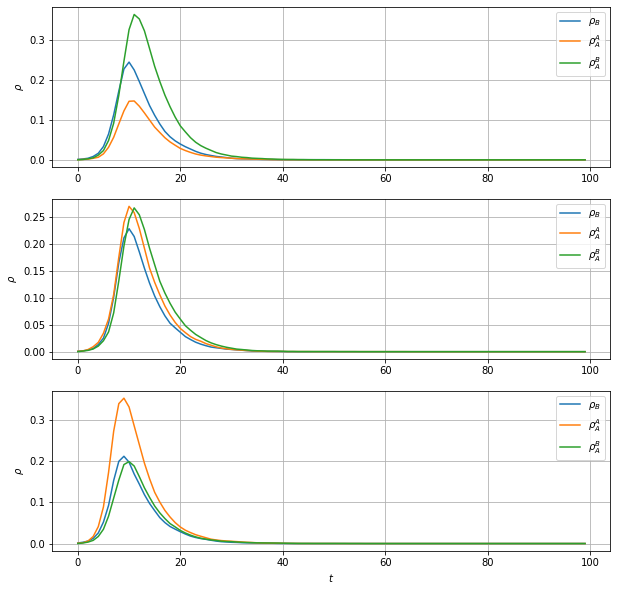

In [15]:
rows, cols = 3, 1
fig, ax = plt.subplots(rows, cols,
                       #sharex='col', 
                       #sharey='row', 
                       figsize=(10,10))

t = [i for i in range(len(res5[0][0]))]

ax[0].plot(t, res5[0][0], label = r"$\rho_{B}$")
ax[0].plot(t, res5[0][1], label = r"$\rho_{A}^{A}$")
ax[0].plot(t, res5[0][2], label = r"$\rho_{A}^{B}$")

ax[1].plot(t, res7[0][0], label = r"$\rho_{B}$")
ax[1].plot(t, res7[0][1], label = r"$\rho_{A}^{A}$")
ax[1].plot(t, res7[0][2], label = r"$\rho_{A}^{B}$")

ax[2].plot(t, res9[0][0], label = r"$\rho_{B}$")
ax[2].plot(t, res9[0][1], label = r"$\rho_{A}^{A}$")
ax[2].plot(t, res9[0][2], label = r"$\rho_{A}^{B}$")

ax[0].grid()
ax[1].grid() 
ax[2].grid()

ax[0].legend()
ax[1].legend()
ax[2].legend()

ax[2].set_xlabel(r"$t$")

ax[0].set_ylabel(r"$\rho$")
ax[1].set_ylabel(r"$\rho$")
ax[2].set_ylabel(r"$\rho$")

plt.savefig("Fig6_Y.pdf")

plt.show()

## Plot Results - Old

In [6]:
df_A_phi0 = pd.read_csv(path+"results_betaA_phi0_O.csv", header = None)
df_B_phi0 = pd.read_csv(path+"results_betaB_phi0_O.csv", header = None)
df_A_phi2 = pd.read_csv(path+"results_betaA_phi2_O.csv", header = None)
df_B_phi2 = pd.read_csv(path+"results_betaB_phi2_O.csv", header = None)
df_A_phi4 = pd.read_csv(path+"results_betaA_phi4_O.csv", header = None)
df_B_phi4 = pd.read_csv(path+"results_betaB_phi4_O.csv", header = None)

df_A_phi0.columns = ["index", "betaA", "betaB", "RA", "RB", "VB"] 
df_B_phi0.columns = ["index", "betaA", "betaB", "RA", "RB", "VB"] 
df_A_phi2.columns = ["index", "betaA", "betaB", "RA", "RB", "VB"] 
df_B_phi2.columns = ["index", "betaA", "betaB", "RA", "RB", "VB"] 
df_A_phi4.columns = ["index", "betaA", "betaB", "RA", "RB", "VB"] 
df_B_phi4.columns = ["index", "betaA", "betaB", "RA", "RB", "VB"] 

df_A_b2 = pd.read_csv(path+"results_betaA_b2_O.csv", header = None)
df_B_b2 = pd.read_csv(path+"results_betaB_b2_O.csv", header = None)
df_A_b5 = pd.read_csv(path+"results_betaA_b5_O.csv", header = None)
df_B_b5 = pd.read_csv(path+"results_betaB_b5_O.csv", header = None)
df_A_b8 = pd.read_csv(path+"results_betaA_b8_O.csv", header = None)
df_B_b8 = pd.read_csv(path+"results_betaB_b8_O.csv", header = None)

df_A_b2.columns = ["index", "betaA", "betaB", "RA", "RB", "VB"] 
df_B_b2.columns = ["index", "betaA", "betaB", "RA", "RB", "VB"] 
df_A_b5.columns = ["index", "betaA", "betaB", "RA", "RB", "VB"] 
df_B_b5.columns = ["index", "betaA", "betaB", "RA", "RB", "VB"] 
df_A_b8.columns = ["index", "betaA", "betaB", "RA", "RB", "VB"] 
df_B_b8.columns = ["index", "betaA", "betaB", "RA", "RB", "VB"] 

In [7]:
df_A_phi0 = df_A_phi0.groupby(['index']).mean()
df_B_phi0 = df_B_phi0.groupby(['index']).mean()
df_A_phi2 = df_A_phi2.groupby(['index']).mean()
df_B_phi2 = df_B_phi2.groupby(['index']).mean()
df_A_phi4 = df_A_phi4.groupby(['index']).mean()
df_B_phi4 = df_B_phi4.groupby(['index']).mean()
df_A_b2   =   df_A_b2.groupby(['index']).mean()  
df_B_b2   =   df_B_b2.groupby(['index']).mean()  
df_A_b5   =   df_A_b5.groupby(['index']).mean()  
df_B_b5   =   df_B_b5.groupby(['index']).mean()  
df_A_b8   =   df_A_b8.groupby(['index']).mean()  
df_B_b8   =   df_B_b8.groupby(['index']).mean()  

### Fig 3

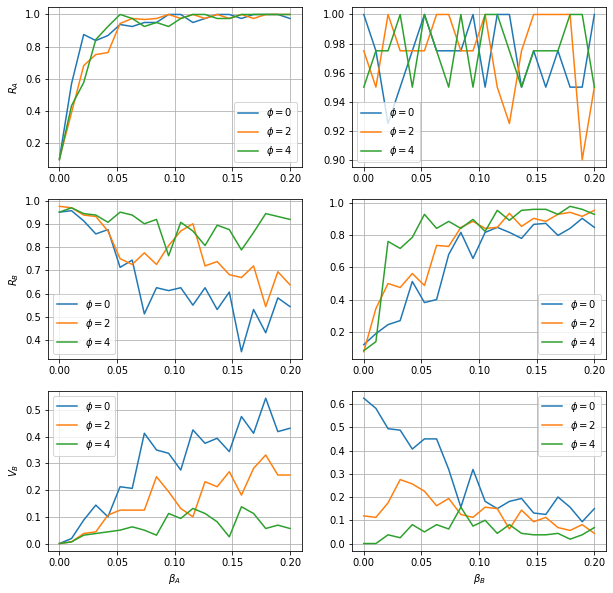

In [8]:
rows, cols = 3, 2
fig, ax = plt.subplots(rows, cols,
                       #sharex='col', 
                       #sharey='row', 
                       figsize=(10,10))

ax[0,0].plot(df_A_phi0["betaA"], df_A_phi0["RA"], label = r"$\phi = 0$")
ax[0,0].plot(df_A_phi2["betaA"], df_A_phi2["RA"], label = r"$\phi = 2$")
ax[0,0].plot(df_A_phi4["betaA"], df_A_phi4["RA"], label = r"$\phi = 4$")

ax[1,0].plot(df_A_phi0["betaA"], df_A_phi0["RB"], label = r"$\phi = 0$")
ax[1,0].plot(df_A_phi2["betaA"], df_A_phi2["RB"], label = r"$\phi = 2$")
ax[1,0].plot(df_A_phi4["betaA"], df_A_phi4["RB"], label = r"$\phi = 4$")

ax[2,0].plot(df_A_phi0["betaA"], df_A_phi0["VB"], label = r"$\phi = 0$")
ax[2,0].plot(df_A_phi2["betaA"], df_A_phi2["VB"], label = r"$\phi = 2$")
ax[2,0].plot(df_A_phi4["betaA"], df_A_phi4["VB"], label = r"$\phi = 4$")

ax[0,1].plot(df_B_phi0["betaB"], df_B_phi0["RA"], label = r"$\phi = 0$")
ax[0,1].plot(df_B_phi2["betaB"], df_B_phi2["RA"], label = r"$\phi = 2$")
ax[0,1].plot(df_B_phi4["betaB"], df_B_phi4["RA"], label = r"$\phi = 4$")

ax[1,1].plot(df_B_phi0["betaB"], df_B_phi0["RB"], label = r"$\phi = 0$")
ax[1,1].plot(df_B_phi2["betaB"], df_B_phi2["RB"], label = r"$\phi = 2$")
ax[1,1].plot(df_B_phi4["betaB"], df_B_phi4["RB"], label = r"$\phi = 4$")

ax[2,1].plot(df_B_phi0["betaB"], df_B_phi0["VB"], label = r"$\phi = 0$")
ax[2,1].plot(df_B_phi2["betaB"], df_B_phi2["VB"], label = r"$\phi = 2$")
ax[2,1].plot(df_B_phi4["betaB"], df_B_phi4["VB"], label = r"$\phi = 4$")

#ax[0,0].set_ylim(0,1)
#ax[1,0].set_ylim(0,1)
#ax[2,0].set_ylim(0,1)

ax[0,0].grid()
ax[1,0].grid() 
ax[2,0].grid()
ax[0,1].grid()
ax[1,1].grid() 
ax[2,1].grid()

ax[0,0].legend()
ax[1,0].legend()
ax[2,0].legend()
ax[0,1].legend()
ax[1,1].legend()
ax[2,1].legend()

ax[2,0].set_xlabel(r"$\beta_A$")
ax[2,1].set_xlabel(r"$\beta_B$")

ax[0,0].set_ylabel(r"$R_A$")
ax[1,0].set_ylabel(r"$R_B$")
ax[2,0].set_ylabel(r"$V_B$")

plt.savefig("Fig3_O.pdf")

plt.show()

### Fig 4

In [ ]:
rows, cols = 3, 2
fig, ax = plt.subplots(rows, cols,
                       #sharex='col', 
                       #sharey='row', 
                       figsize=(10,10))

ax[0,0].plot(df_A_b2["betaA"], df_A_b2["RA"], label = r"$\beta_B = 0.2$")
ax[0,0].plot(df_A_b5["betaA"], df_A_b5["RA"], label = r"$\beta_B = 0.5$")
ax[0,0].plot(df_A_b8["betaA"], df_A_b8["RA"], label = r"$\beta_B = 0.8$")

ax[1,0].plot(df_A_b2["betaA"], df_A_b2["RB"], label = r"$\beta_B = 0.2$")
ax[1,0].plot(df_A_b5["betaA"], df_A_b5["RB"], label = r"$\beta_B = 0.5$")
ax[1,0].plot(df_A_b8["betaA"], df_A_b8["RB"], label = r"$\beta_B = 0.8$")

ax[2,0].plot(df_A_b2["betaA"], df_A_b2["VB"], label = r"$\beta_B = 0.2$")
ax[2,0].plot(df_A_b5["betaA"], df_A_b5["VB"], label = r"$\beta_B = 0.5$")
ax[2,0].plot(df_A_b8["betaA"], df_A_b8["VB"], label = r"$\beta_B = 0.8$")

ax[0,1].plot(df_B_b2["betaB"], df_B_b2["RA"], label = r"$\beta_A = 0.2$")
ax[0,1].plot(df_B_b5["betaB"], df_B_b5["RA"], label = r"$\beta_A = 0.5$")
ax[0,1].plot(df_B_b8["betaB"], df_B_b8["RA"], label = r"$\beta_A = 0.8$")

ax[1,1].plot(df_B_b2["betaB"], df_B_b2["RB"], label = r"$\beta_A = 0.2$")
ax[1,1].plot(df_B_b5["betaB"], df_B_b5["RB"], label = r"$\beta_A = 0.5$")
ax[1,1].plot(df_B_b8["betaB"], df_B_b8["RB"], label = r"$\beta_A = 0.8$")

ax[2,1].plot(df_B_b2["betaB"], df_B_b2["VB"], label = r"$\beta_A = 0.2$")
ax[2,1].plot(df_B_b5["betaB"], df_B_b5["VB"], label = r"$\beta_A = 0.5$")
ax[2,1].plot(df_B_b8["betaB"], df_B_b8["VB"], label = r"$\beta_A = 0.8$")

#ax[0,0].set_ylim(0,1)
#ax[1,0].set_ylim(0,1)
#ax[2,0].set_ylim(0,1)

ax[0,0].grid()
ax[1,0].grid() 
ax[2,0].grid()
ax[0,1].grid()
ax[1,1].grid() 
ax[2,1].grid()

ax[0,0].legend()
ax[1,0].legend()
ax[2,0].legend()
ax[0,1].legend()
ax[1,1].legend()
ax[2,1].legend()

ax[2,0].set_xlabel(r"$\beta_A$")
ax[2,1].set_xlabel(r"$\beta_B$")

ax[0,0].set_ylabel(r"$R_A$")
ax[1,0].set_ylabel(r"$R_B$")
ax[2,0].set_ylabel(r"$V_B$")

plt.savefig("Fig4_O.pdf")

plt.show()

### Fig. 6 

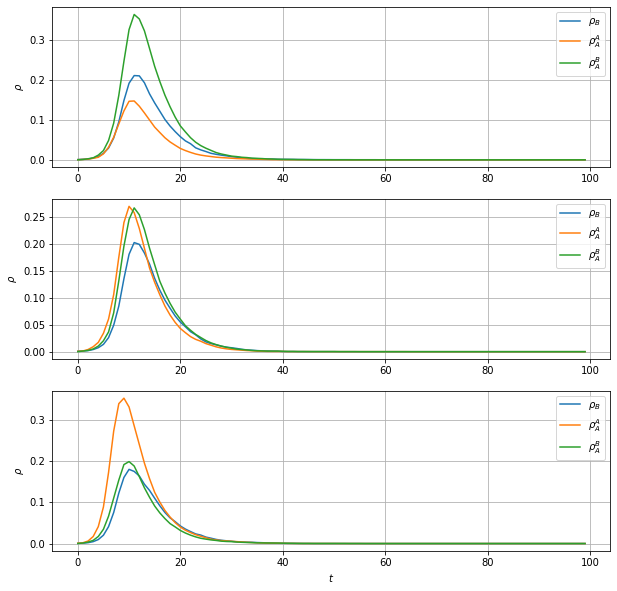

In [17]:
rows, cols = 3, 1
fig, ax = plt.subplots(rows, cols,
                       #sharex='col', 
                       #sharey='row', 
                       figsize=(10,10))

t = [i for i in range(len(res5[1][0]))]

ax[0].plot(t, res5[1][0], label = r"$\rho_{B}$")
ax[0].plot(t, res5[1][1], label = r"$\rho_{A}^{A}$")
ax[0].plot(t, res5[1][2], label = r"$\rho_{A}^{B}$")

ax[1].plot(t, res7[1][0], label = r"$\rho_{B}$")
ax[1].plot(t, res7[1][1], label = r"$\rho_{A}^{A}$")
ax[1].plot(t, res7[1][2], label = r"$\rho_{A}^{B}$")

ax[2].plot(t, res9[1][0], label = r"$\rho_{B}$")
ax[2].plot(t, res9[1][1], label = r"$\rho_{A}^{A}$")
ax[2].plot(t, res9[1][2], label = r"$\rho_{A}^{B}$")

#ax[0].set_xlim(0,30)
#ax[1].set_xlim(0,30)
#ax[2].set_xlim(0,30)

ax[0].grid()
ax[1].grid() 
ax[2].grid()

ax[0].legend()
ax[1].legend()
ax[2].legend()

ax[2].set_xlabel(r"$t$")

ax[0].set_ylabel(r"$\rho$")
ax[1].set_ylabel(r"$\rho$")
ax[2].set_ylabel(r"$\rho$")

plt.savefig("Fig6_O.pdf")

plt.show()